# Projeto 2

In [ ]:
# instalando depencias
!pip3 install numpy
!pip3 install matplotlib
!pip3 install scipy
!pip3 install pydub

In [1]:
# importando dependencias
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import math
import time
from PIL import Image
from scipy import fftpack

## DCT

In [2]:
# DCT
def DCT1D(data):
    N = len(data)
    X = np.zeros(N)
    aK = math.sqrt(2.0/N)

    for k in range(N):
        ck = math.sqrt(1.0/2.0) if k == 0 else 1
        s = 0

        for n in range(N):
            a1 = 2.0 * math.pi * k * n
            a2 = k * math.pi
            nn = 2.0 * N

            s += data[n] * math.cos((a1/nn) + (a2/nn))

        X[k] = aK * ck * s

    return X

## IDCT

In [3]:
# IDCT
def IDCT1D(data):
    N = len(data)
    x = np.zeros(N)
    
    aK = math.sqrt(2.0/N)
    
    for n in range(N):
        s = 0
        for k in range(N):
            a1 = 2.0 * math.pi * k * n
            a2 = k * math.pi
            nn = 2.0 * N
            cK = math.sqrt(1.0/2.0) if k == 0 else 1
                
            s += cK * data[k] * math.cos((a1/nn) + (a2/nn))
            
        x[n] = aK * s
    
    return x

### Testes DCT e IDCT

In [160]:
x = np.array([5.9285,2.1515,0.4693,-0.5441,0.9595,3.6881,4.0156])

X_DCT = DCT1D(x)
X_IDCT = IDCT1D(X_DCT)

In [161]:
x

array([ 5.9285,  2.1515,  0.4693, -0.5441,  0.9595,  3.6881,  4.0156])

In [162]:
X_IDCT

array([ 5.9285,  2.1515,  0.4693, -0.5441,  0.9595,  3.6881,  4.0156])

# Audio

In [417]:
# Read Wav File
filename = "MaisUmaSemana.wav"
portion_slice = 2000
base = 20000
audio_rate, audio_data = wavfile.read("./" + filename)
# audio_portion = audio_data[base:base+portion_slice]
audio_portion = audio_data
audio_data.shape

(45498,)

In [29]:
# draw audio wave graph
def plot_audio_wave(data, figsize=[20,6], color="blue", y_label="Amplitude", stroke=0.5, title=""):
    plt.figure('Data', figsize=figsize)
    plt.plot(data, linewidth=stroke,alpha=1,color=color)
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

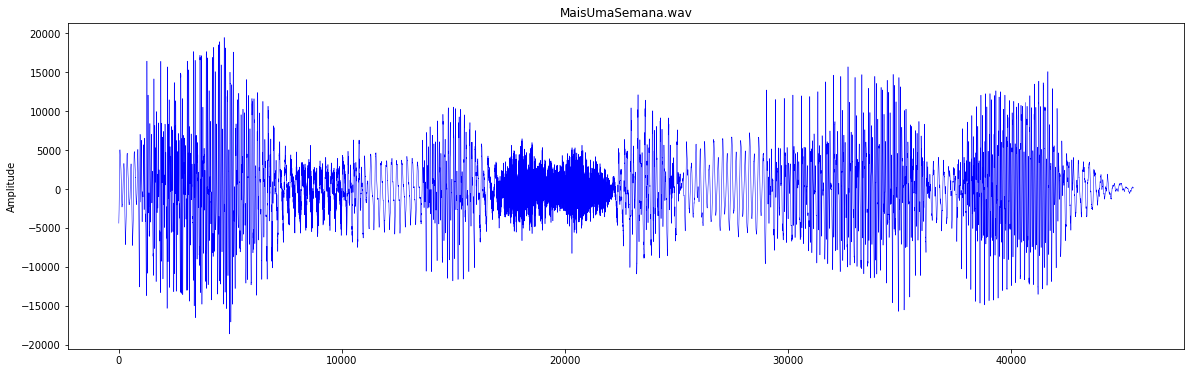

In [419]:
plot_audio_wave(audio_data, title=filename)
# plot_audio_wave(audio_portion, title="{} - {} Slice".format(filename, portion_slice))

## DCT AUDIO

In [420]:
print("DCT audio...")
inicio = time.time()
DCT = DCT1D(audio_portion)
fim = time.time()
print("DCT Done! - took {:3f} seconds" .format((fim - inicio)*1000.0))

DCT audio...
DCT Done! - took 4951277.557373 seconds


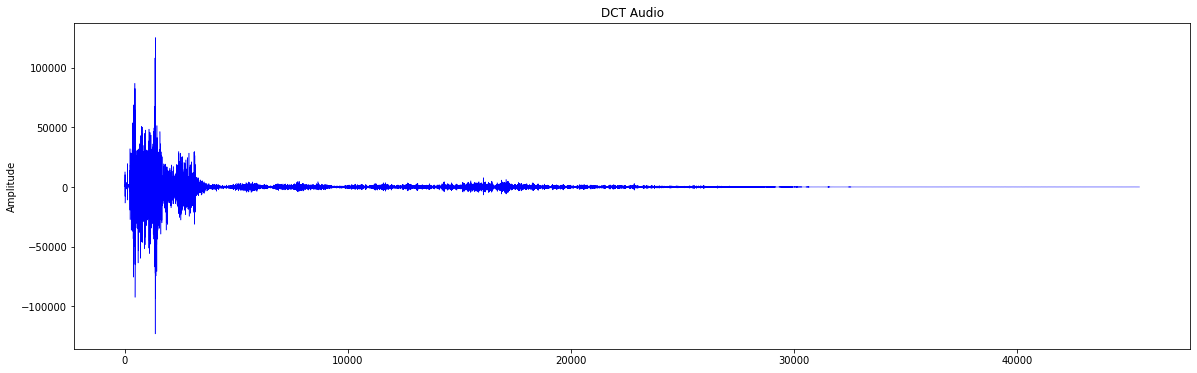

Nivel DC: 2183.6442487570853


In [421]:
plot_audio_wave(DCT, title="DCT Audio")
print("Nivel DC: {}".format(DCT[0]))

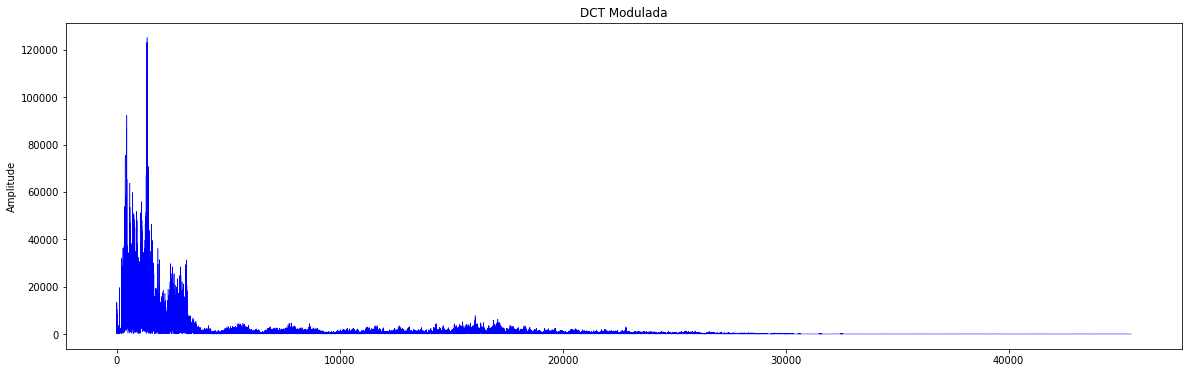

Numero de frequências desejadas?  5000


In [432]:
DCT_filtered = DCT.copy()
DCT_values = DCT_filtered.copy()
selected_frequencies = []

# Valores modulados
for i in range(len(DCT)):
    DCT_values[i] = abs(DCT_values[i])
    
plot_audio_wave(DCT_values, title="DCT Modulada")
num = int(input("Numero de frequências desejadas? "))

In [433]:
aux = DCT_values.copy()
aux_sorted = list(enumerate(aux))

def sortKey(e):
    return e[1]

aux_sorted.sort(key=sortKey)
aux_sorted = aux_sorted[::-1]

selected_frequencies = [aux_sorted[i][0] for i in range(num)]
selected_frequencies.insert(0, aux[0])

# freq_selecionadas

In [434]:
for i in range(len(DCT_filtered)):
    if i not in selected_frequencies:
        DCT_filtered[i] = 0
        
# print(freq_selecionadas)

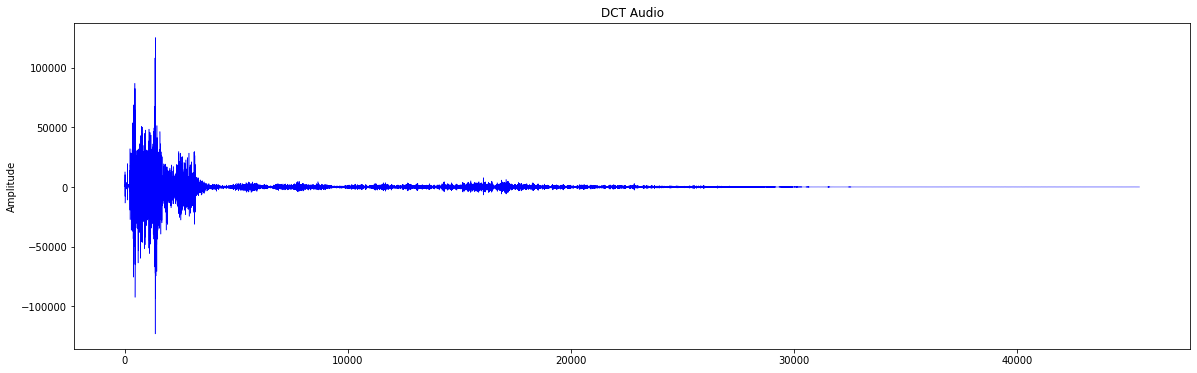

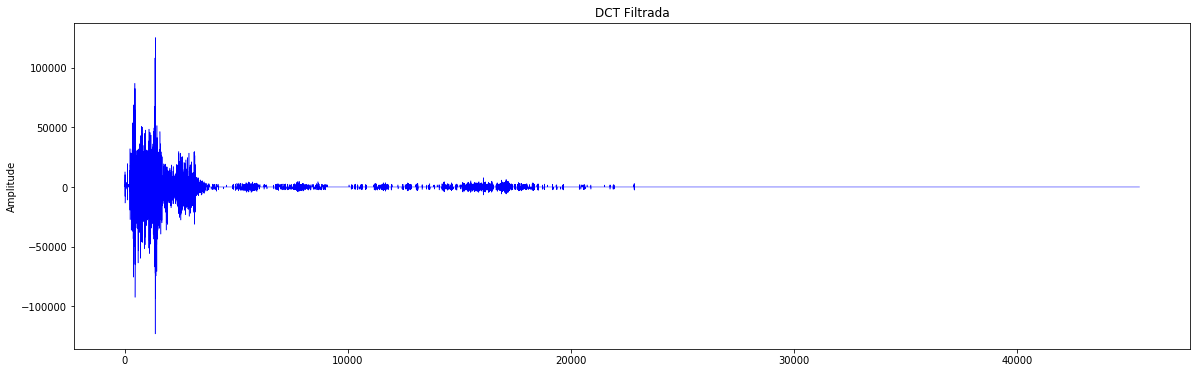

In [435]:
plot_audio_wave(DCT, title="DCT Audio")
plot_audio_wave(DCT_filtered, title="DCT Filtrada")

In [436]:
# IDCT
print("IDCT audio...")
inicio = time.time()
IDCT = IDCT1D(DCT_filtered)
fim = time.time()
print("IDCT Done! - took {:3f} seconds" .format((fim - inicio)))


IDCT audio...
IDCT Done! - took 1997.486819 seconds


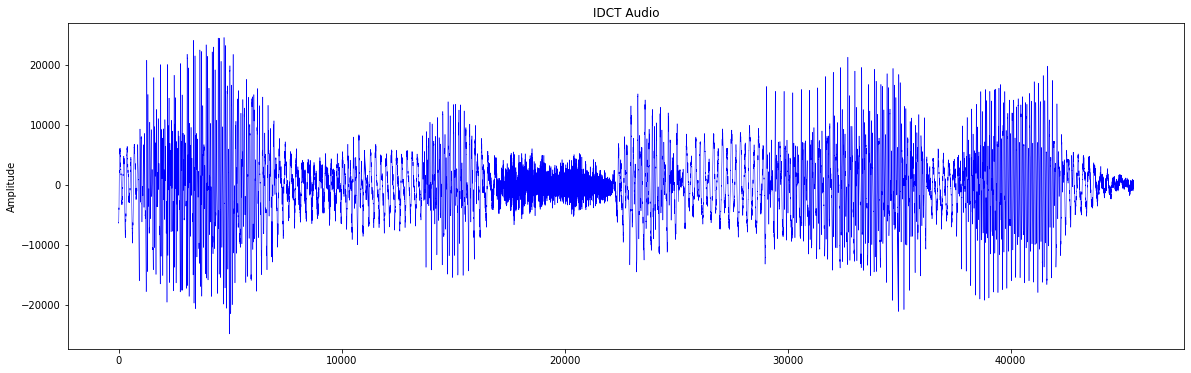

In [439]:
plot_audio_wave(IDCT, title="IDCT Audio")

In [440]:

# audio_tranformado = IDCT1D(DCT)
# audio_tranformado = fftpack.idct(DCT_filtered, norm="ortho")
audio_tranformado = IDCT
audio_tranformado *= 1.3
audio_tranformado = audio_tranformado.astype("int16")

wavfile.write("IDCT-{}.wav".format(num), audio_rate, audio_tranformado)

# DCT Imagem

In [4]:
imagem = Image.open("lena.bmp")
imagem = np.asarray(imagem)

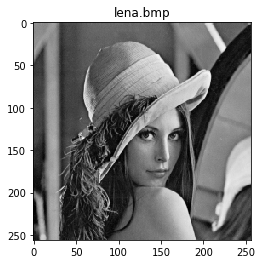

In [5]:
plt.imshow(imagem, cmap="gray")
plt.title("lena.bmp")
plt.show()

In [6]:
imgDCT = np.zeros(imagem.shape)

inicio = time.time()
# aplicar DCT verticalmente
for i, linha in enumerate(imagem):
    imgDCT[i] = DCT1D(linha)
    
imgDCT = imgDCT.T
# Aplica DCT nas colunas
for i, linha in enumerate(imgDCT):
    imgDCT[i] = DCT1D(linha)

fim = time.time()
print("DCT Levou: {} segundos".format((fim - inicio)))

DCT Levou: 49.70137357711792 segundos


In [7]:
imgDCT = imgDCT.T
img_dc = imgDCT[0][0]
print("Nivel DC: {}".format(imgDCT[0][0]))

Nivel DC: 25261.12890625001


Text(0.5, 1.0, 'Com DC')

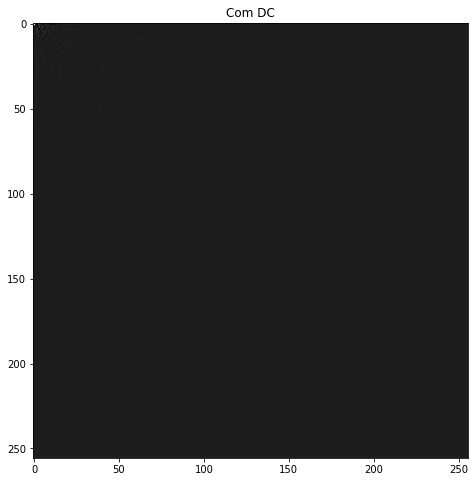

In [8]:
plt.figure(figsize=[80,8])
plt.imshow(imgDCT, cmap="gray")
plt.title("Com DC")

Text(0.5, 1.0, 'SEM DC')

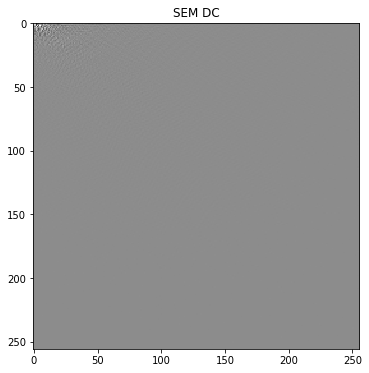

In [9]:
imgDCT[0][0] = 0
plt.figure(figsize=[60,6])
plt.imshow(imgDCT, cmap="gray")
plt.title("SEM DC")

# Normalização

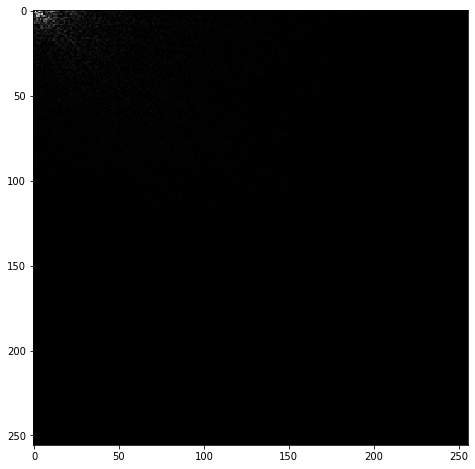

In [10]:
norm_img = imgDCT.copy()

for i in range(norm_img.shape[0]):
    for j in range(norm_img.shape[1]):
        norm_img[i][j] = abs(norm_img[i][j])

plt.figure(figsize=[80,8])
plt.imshow(norm_img, cmap="gray")


In [17]:
img_selected_freq = []
img_num = int(input("Numero de frequências? "))

Numero de frequências? 5000


In [18]:
imgDCT_filtered = imgDCT.copy()
img_aux = imgDCT_filtered.copy()
img_aux_sorted =  list(np.ndenumerate(norm_img))

def sortKey(e):
    return e[1]


img_aux_sorted.sort(key=sortKey)
img_aux_sorted = img_aux_sorted[::-1]

img_selected_freq = [img_aux_sorted[i][0] for i in range(img_num)]
img_selected_freq.insert(0, (0,0))

In [19]:
for i in range(imgDCT_filtered.shape[0]):
    for j in range(imgDCT_filtered.shape[1]):
        if (i, j) not in img_selected_freq:
            imgDCT_filtered[i][j] = 0

# IDCT

In [20]:
imgIDCT = np.zeros(imagem.shape)

inicio = time.time()
for i, linha in enumerate(imgDCT_filtered):
    imgIDCT[i] = IDCT1D(linha)
    

imgIDCT_Trans = imgIDCT.T

for i, linha in enumerate(imgIDCT_Trans):
    imgIDCT_Trans[i] = IDCT1D(linha)
    
    
fim = time.time()
print("IDCT Levou: {} segundos".format((fim - inicio)))

imgIDCT = imgIDCT

IDCT Levou: 27.68342900276184 segundos


Text(0.5, 1.0, 'IDCT Imagem - 5000 Amostras')

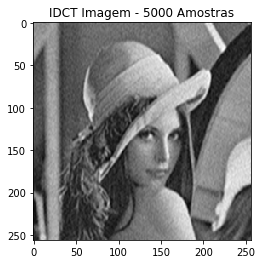

In [21]:
plt.imshow(imgIDCT, cmap="gray")
plt.title("IDCT Imagem - {} Amostras".format(img_num))

# Compactador/Expansor de frequências

In [40]:
# Read Wav File
filename = "MaisUmaSemana.wav"
comp_rate, comp_data = wavfile.read("./" + filename)
comp_data.shape

(45498,)

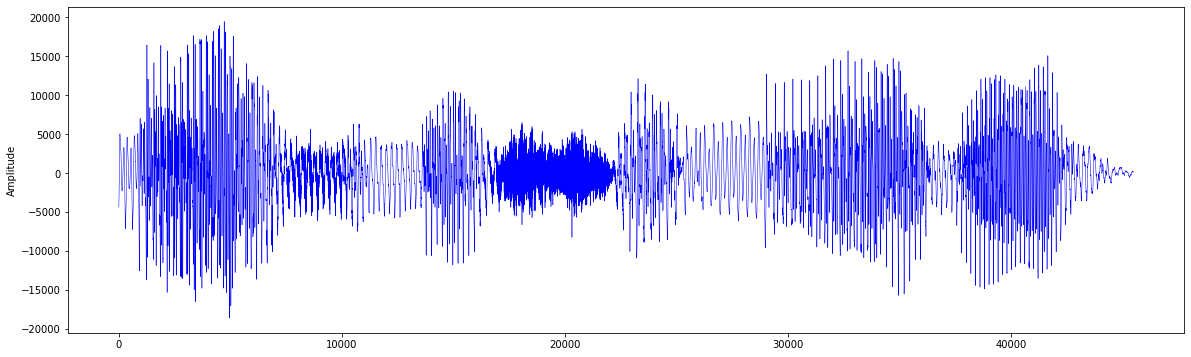

In [41]:
plot_audio_wave(comp_data)

In [42]:
def compactador(X,c):
    N = len(X)
    Xt = np.zeros(N)
    for i in range(N):
        if(round(i*c) < N):
            Xt[round(i*c)] = X[i]
    return Xt

In [48]:
comp_dct_audio = DCT1D(audio_data)

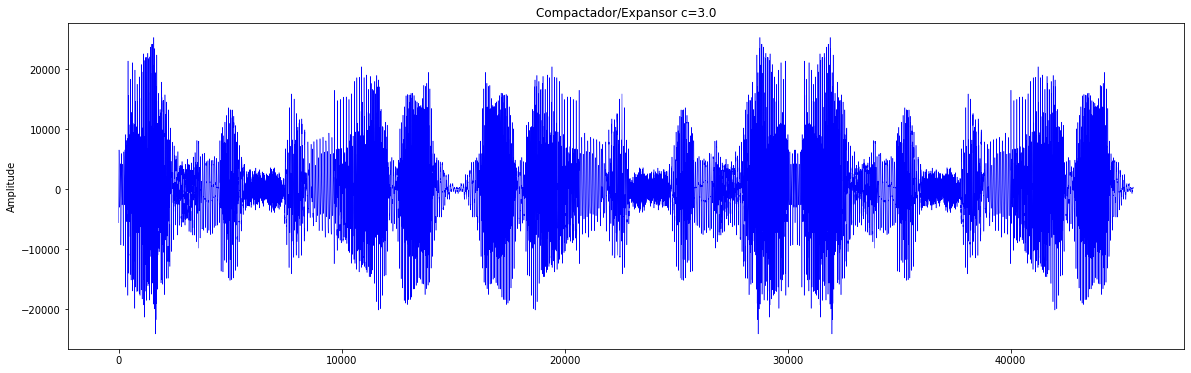

In [56]:
c = float(3)
cc = compactador(comp_dct_audio.copy(), c)
comp_idct_audio = IDCT1D(cc)
comp_idct_audio *= 1.3
comp_idct_audio = comp_idct_audio.astype("int16")
plot_audio_wave(comp_idct_audio, title="Compactador/Expansor c={}".format(c))
wavfile.write("compactador-{}.wav".format(c), comp_rate, comp_idct_audio)